In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [7]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [8]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
dataset[dataset["bmi"].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [17]:
dataset.bmi.fillna(dataset.bmi.mean(), inplace=True)

In [87]:
dataset.groupby("gender").count()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115
Other,1,1,1,1,1,1,1,1,1,1,1


In [118]:
dataset.groupby("work_type").count().index

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object', name='work_type')

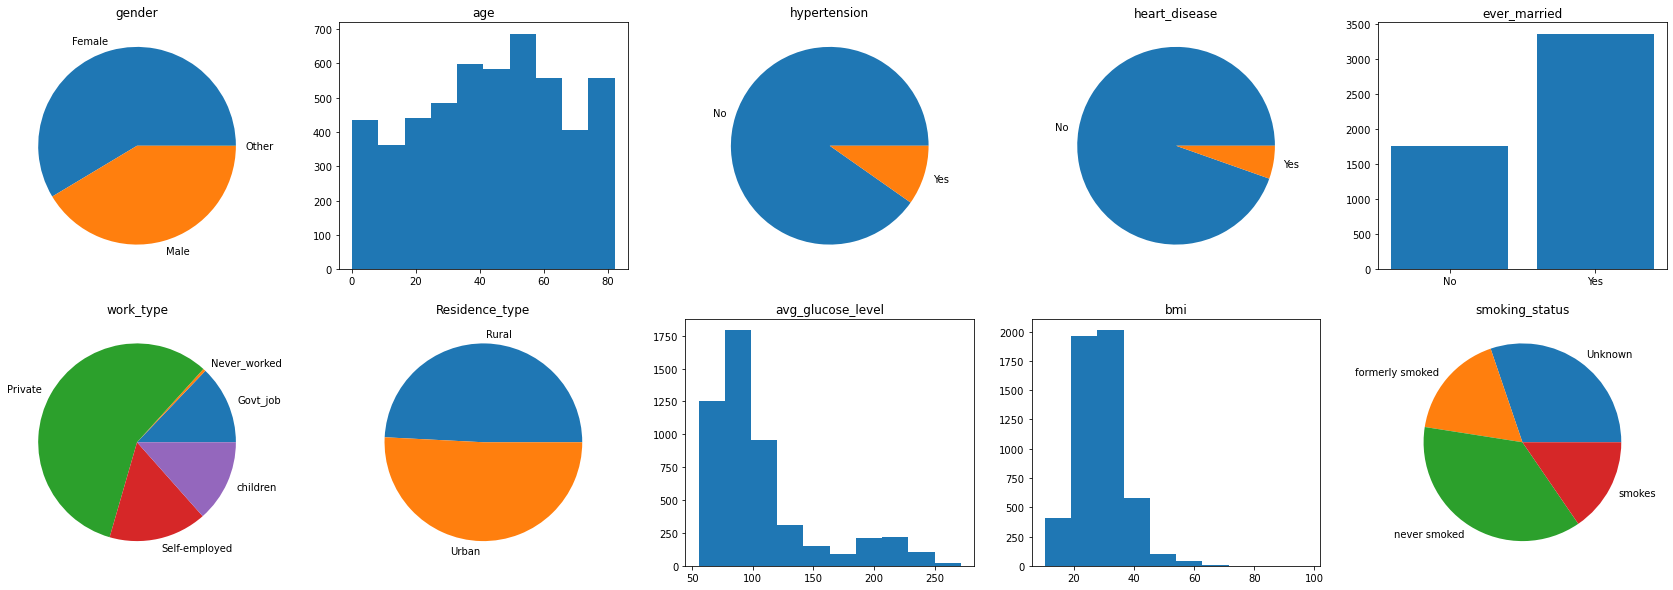

In [132]:
fig, ax = plt.subplots(2,5)
fig.set_size_inches(30,10)

ax[0][0].pie(dataset.groupby("gender").count()["id"], labels = dataset.groupby("gender").count().index);
ax[0][0].set_title("gender");

ax[0][1].hist(dataset.age);
ax[0][1].set_title("age");

ax[0][2].pie(dataset.groupby("hypertension").count()["id"], labels = ["No", "Yes"]);
ax[0][2].set_title("hypertension");

ax[0][3].pie(dataset.groupby("heart_disease").count()["id"], labels = ["No", "Yes"]);
ax[0][3].set_title("heart_disease");

ax[0][4].bar(dataset.groupby("ever_married").count().index,dataset.groupby("ever_married").count()["id"]);
ax[0][4].set_title("ever_married");

ax[1][0].pie(dataset.groupby("work_type").count()["id"], labels = dataset.groupby("work_type").count().index);
ax[1][0].set_title("work_type");

ax[1][1].pie(dataset.groupby("Residence_type").count()["id"], labels = dataset.groupby("Residence_type").count().index);
ax[1][1].set_title("Residence_type");

ax[1][2].hist(dataset.avg_glucose_level);
ax[1][2].set_title("avg_glucose_level");

ax[1][3].hist(dataset.bmi);
ax[1][3].set_title("bmi");

ax[1][4].pie(dataset.groupby("smoking_status").count()["id"], labels = dataset.groupby("smoking_status").count().index);
ax[1][4].set_title("smoking_status");


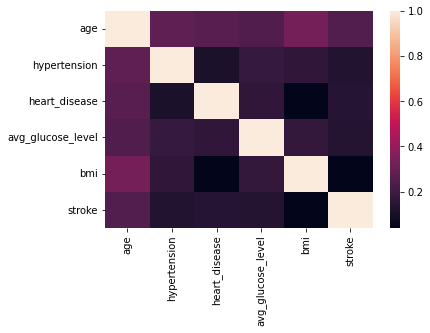

In [161]:
sns.heatmap(dataset[dataset.columns[1:]].corr());

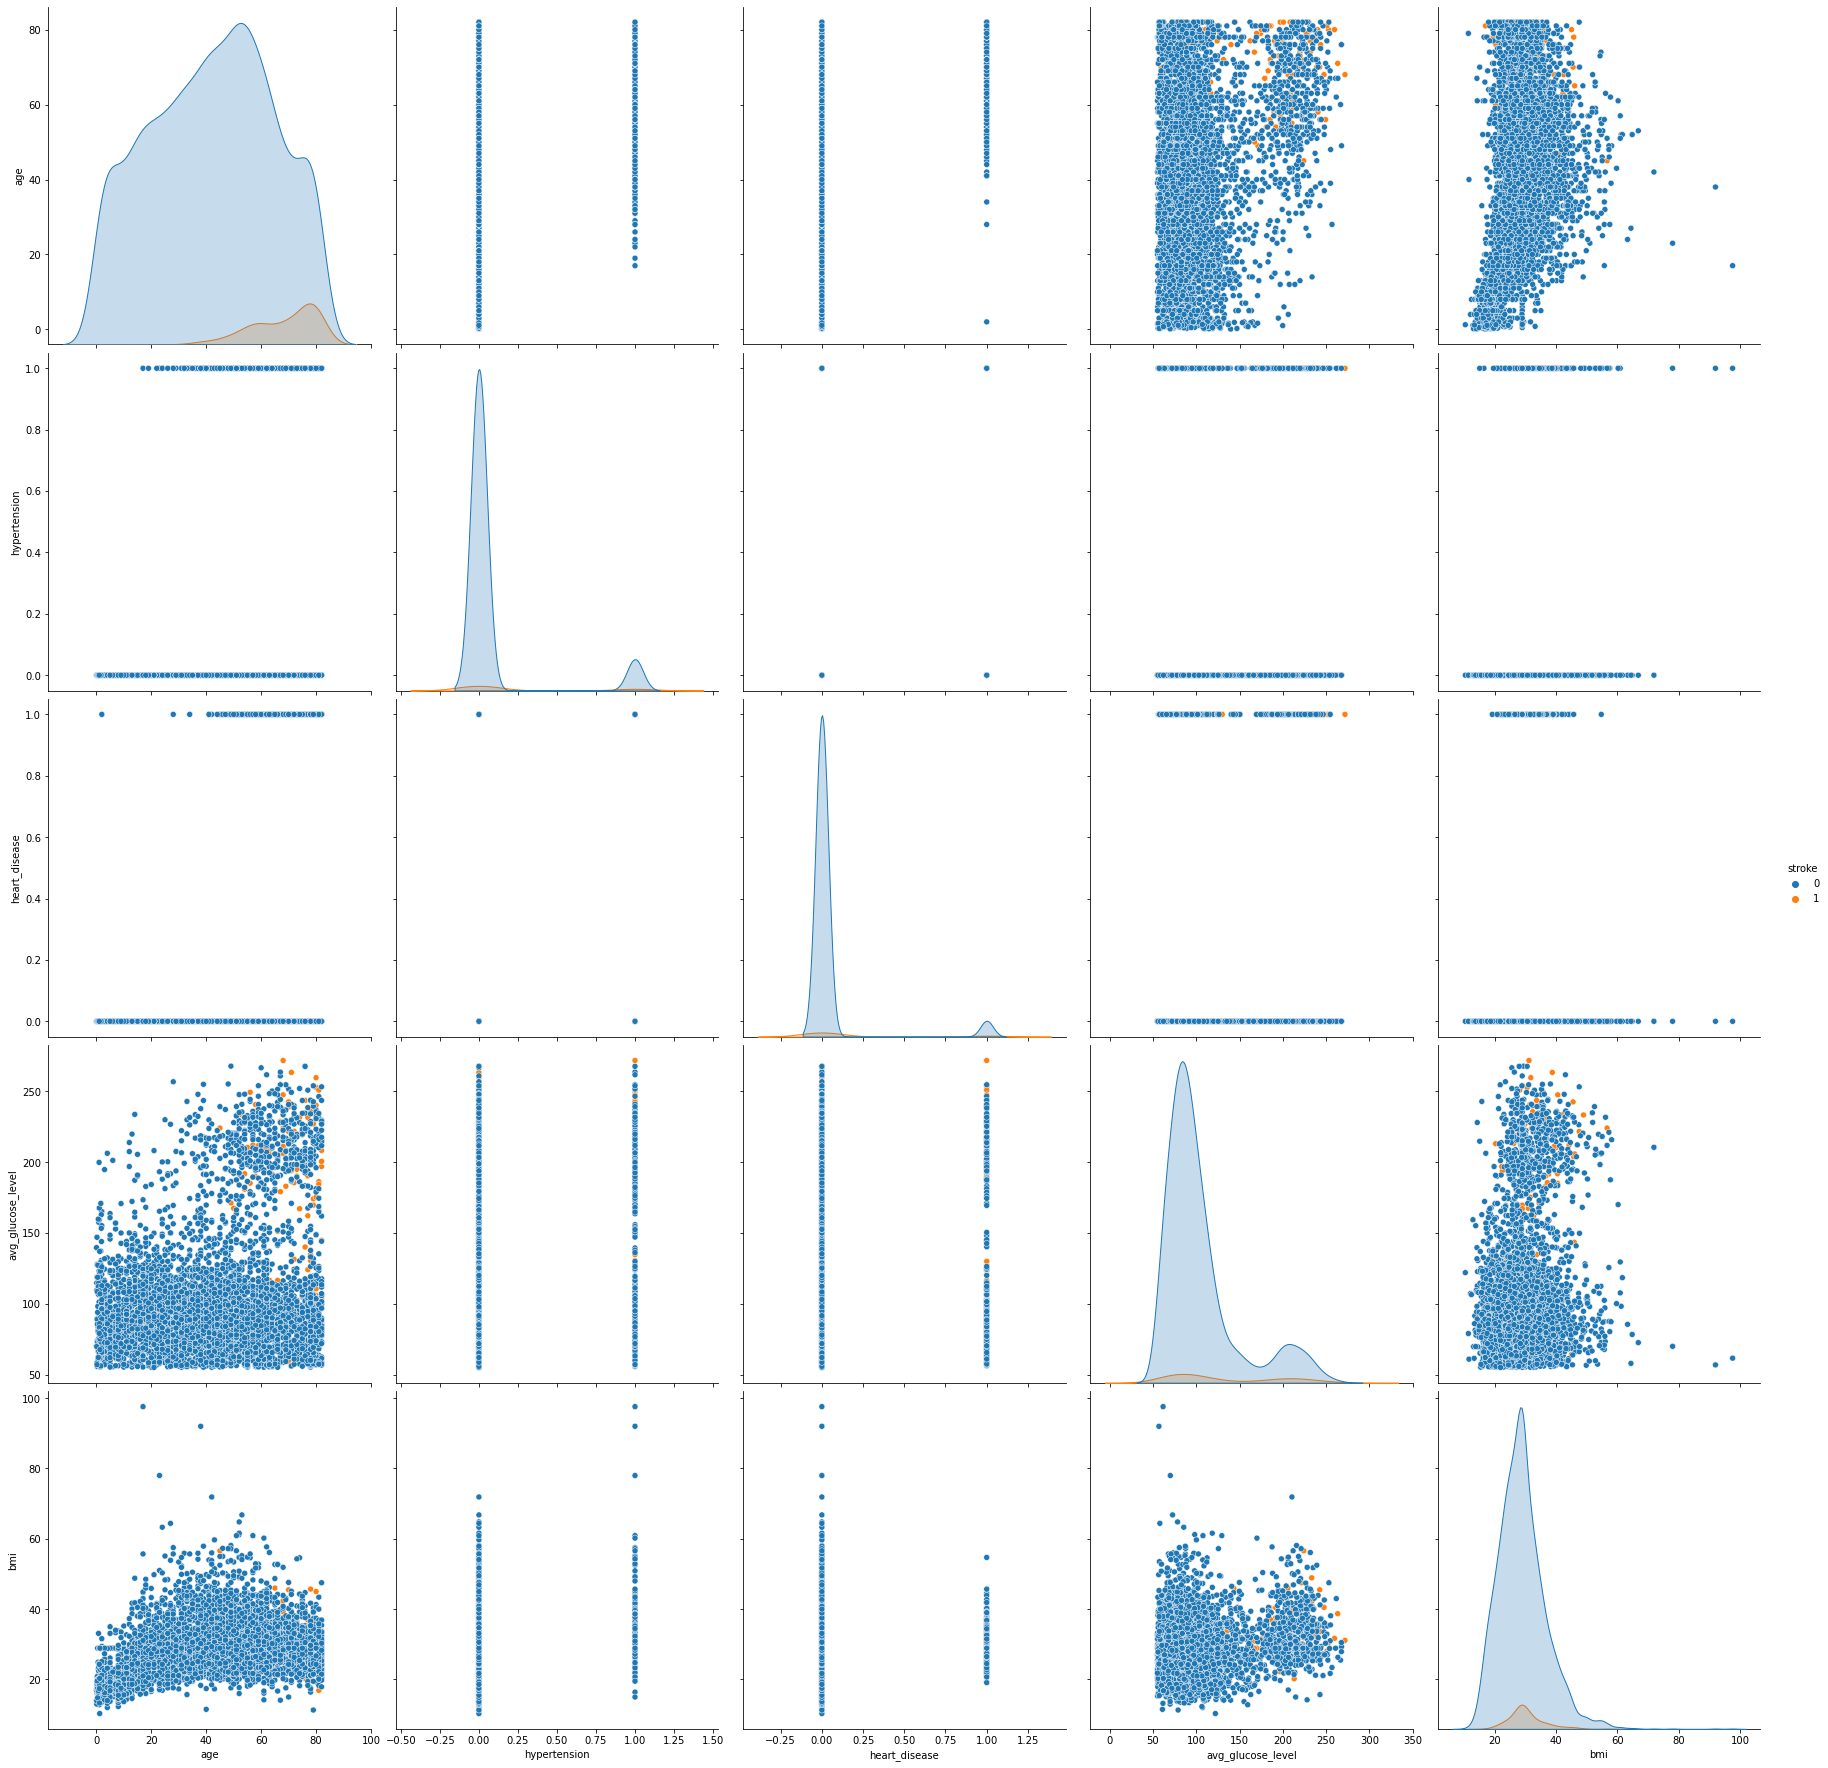

In [162]:
sns.pairplot(dataset[dataset.columns[1:]], hue="stroke", height=5);

<AxesSubplot:>

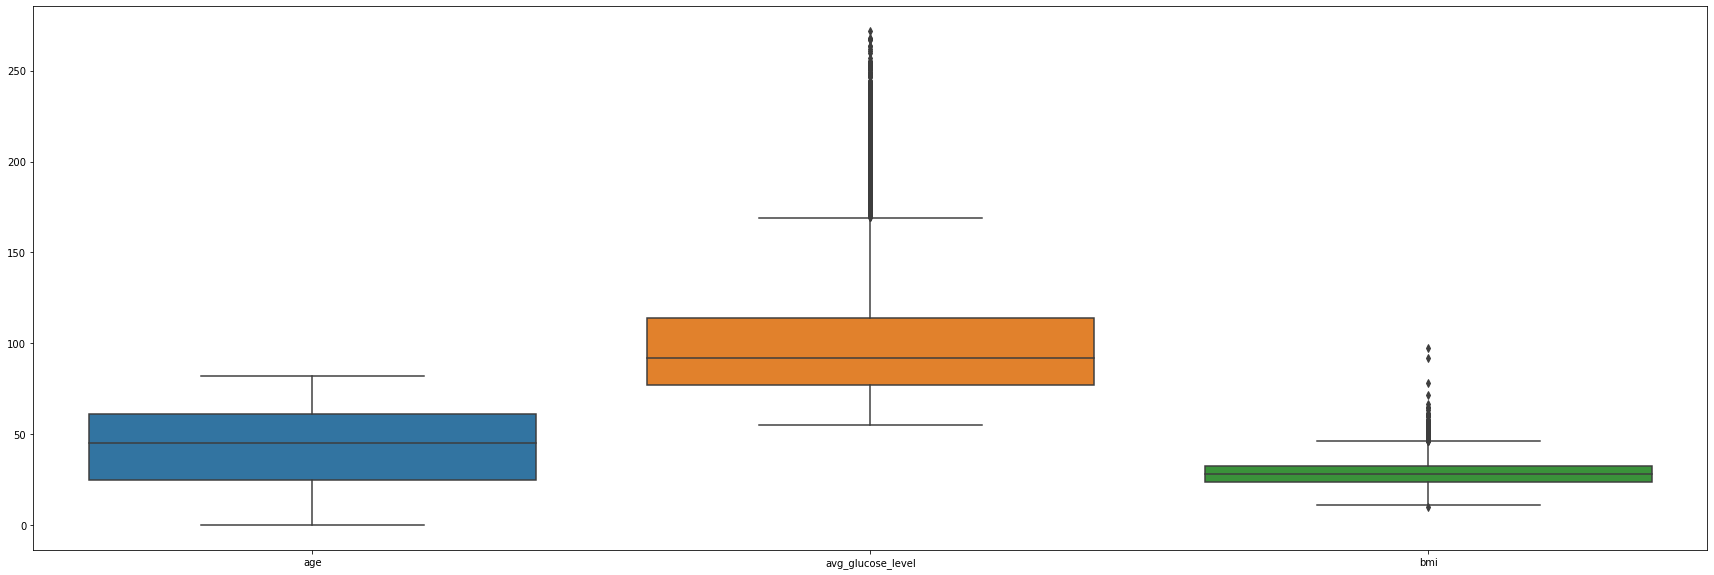

In [181]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(30,10)
sns.boxplot(data=dataset[["age", "avg_glucose_level","bmi"]], ax=ax)